# QTM 151 Final Project
## Project Members: Tammy Dang, Bao Truong, Jocelyn Nguyen, Chau Anh Nguyen

### Data Description

Formula 1 (F1) is the top-tier of single-seat open-wheel car racing and is widely regarded as one of the most prestigious and popular racing series worldwide. Each race season spans several months and involves multiple teams, with two drivers per team competing on circuits in different countries. Success in F1 is determined by finishing position, with various factors like car and driver performance, weather, and pit stop strategies influencing race outcomes. This project focuses on understanding how pit stops affect race results.

To analyze our data, we combined these datasets using key identifying variables, enabling us to merge pit stop details, race outcomes, and driver information into a unified dataset. Subsequently, we refined our data by extracting pertinent columns, purging placeholder values, converting variables into numerical formats, and consolidating the information. We then computed the cumulative pit stop durations and the overall time spent by each driver during a race. To visually represent our findings, we crafted a scatter plot illustrating the correlation between total pit stop duration and overall race time, followed by the removal of outlier data points for a more focused analysis. Lastly, we applied a linear regression model to establish a best-fit line depicting the relationship between total pit stop duration and overall race time, which we superimposed onto the scatter plot.

We were interested in testing the relation between the duration of pit stops and drivers’ final results. We aim to seek if the duration of pit stops have an overall impact on the race. 

In order to examine this, we will be parsing and analyzing these datasets:

1.   pit_stops.csv
2.   results.csv

Each row represents a driver within an F1 race. This will be distinct based on raceID and driverId. This will be examined in multiple ways, both through frequency of pit stops and wins, total pit time and seconds it takes to win the race, and many others including running regression statistics.

# Import libraries 

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs
# datetime packages for time series manipulation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.dates as mdates
from datetime import date, time, datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Import dataset
For our analysis we will be utilizing two datasets for F1 racing:


1.   pit_stops.csv
2.   results.csv


By taking the csv datasets, driver_standings and pit_stops, we merged them by grouping driverId and raceId and stored them into variable merged_f1. Using this merged dataset, we created some data description diagnostic commands to be used for reference when parsing and cleaning the dataset. 

In [2]:
# Read the CSV file
results = pd.read_csv("data_raw/results.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")


In [3]:
# to see the data
display(results)
display(pit_stops)
# note: We will group them by raceId and driverId when merging

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


# Data Description
In results dataset:
- resultId: Id of the results
- raceId: Id of race
- driverId: Id of the driver
- constructorId: Id of the constructor in charge
- number: Car number
- grid: Position in starting grid
- position: Final position
- positionText: Final position in text
- positionOrder: Final rank
- points: Points
- laps: Laps
- time: Time
- milliseconds: Time in milliseconds
- fastestLap: Lap number of fastest lap
- rank: Rank of fastest lap
- fastestLapTime: Lap time of fastest lap
- fastestLapSpeed: Top speed of fastest lap
- statusId: Id of status

The total observations in results is 25840 observations.

In pit_stops dataset:
- raceId: Id of the race
- driverId: Id of the driver
- stop: Stop number
- lap: Lap number
- time: the time that the pit stop happened
- duration: Duration of pit stop
- milliseconds: Duration of pit stop in milliseconds

The total observations in pit_stops is 9634.

More descriptions can be found in data description diagnostic commands.


In [4]:
#Rename millisecond cols from both datasets
results = results.rename(columns={'milliseconds':'racetime_milli'})
pit_stops = pit_stops.rename(columns={'milliseconds':'pitstop_milli'})

display(results)
display(pit_stops)



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,racetime_milli,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


,raceId,driverId,stop,lap,time,duration,pitstop_milli
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


# MERGE
The following will be the merging process between results and pit_stops. They will be merged by grouping by raceId and driverId and inner joining the dataset. We will then use this to clean and create data descriptions to find out the dataset we can use for graphing, etc.

In [5]:
#merge driver_standings and pit_stops by raceId and driverId. Store this in data frame, merged_f1
merged_f1 = pd.merge(results, pit_stops, on=['raceId', 'driverId'], how='inner')

print(merged_f1.columns) #Check that both renamed column are present ('racetime_milli', 'pitstop_milli')
display(merged_f1)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'racetime_milli', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'stop', 'lap', 'time_y', 'duration',
       'pitstop_milli'],
      dtype='object')


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,lap,time_y,duration,pitstop_milli
0,20779,841,20,9,1,1,1,1,1,25.0,...,44,4,1:29.844,212.488,1,1,14,17:25:17,22.603,22603
1,20779,841,20,9,1,1,1,1,1,25.0,...,44,4,1:29.844,212.488,1,2,36,17:59:17,24.036,24036
2,20780,841,1,1,3,2,2,2,2,18.0,...,41,8,1:30.314,211.382,1,1,16,17:28:24,23.227,23227
3,20780,841,1,1,3,2,2,2,2,18.0,...,41,8,1:30.314,211.382,1,2,36,17:59:29,23.199,23199
4,20781,841,808,4,10,6,3,3,3,15.0,...,55,7,1:30.064,211.969,1,1,16,17:28:39,24.535,24535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,25842,1096,825,210,20,16,17,17,17,0.0,...,40,20,1:31.158,208.556,11,1,28,17:46:53,22.387,22387
9630,25843,1096,1,131,44,5,18,18,18,0.0,...,42,11,1:29.788,211.738,9,1,18,17:30:48,21.270,21270
9631,25844,1096,849,3,6,20,19,19,19,0.0,...,45,14,1:30.309,210.517,130,1,15,17:26:44,22.423,22423
9632,25844,1096,849,3,6,20,19,19,19,0.0,...,45,14,1:30.309,210.517,130,2,38,18:02:50,25.174,25174


# Data Description Diagnostic Commands
The following is code to understand the data we have better.

In [6]:
#How many observations do we have in the dataset?
n_total = len(merged_f1)
print("This dataset has " + str(n_total) + " rows.")

#count non-missing observations
n_nonmiss_duration = merged_f1["duration"].count()  # there are no NAs.
print(n_nonmiss_duration)

n_nonmiss_stop = merged_f1["stop"].count()  # there are no NAs.
print(n_nonmiss_stop)

n_nonmiss_points = merged_f1["points"].count() # there are no NAs.
print(n_nonmiss_points)

# get unique values of race and driverId
list_ids_race = pd.unique(merged_f1["raceId"])

list_ids_driver = pd.unique(merged_f1["driverId"])


# NOTE: please group by race and driverId. As there are different races within this dataset with a participation of d

This dataset has 9634 rows.
9634
9634
9634


# Data Cleaning

In [7]:
# Data Cleaning
merged_clean = merged_f1[['driverId', 'raceId', 'position', 'points', 'stop', 'lap', 'racetime_milli', 'pitstop_milli']]
display(merged_clean.dtypes)
display(merged_clean.query("racetime_milli.str.isnumeric() == False")) 

# Clean out non-numerical entries
merged_clean = merged_clean[merged_clean['racetime_milli'] != '\\N']
merged_clean = merged_clean[merged_clean['position'] != '\\N']

merged_clean['racetime_milli'] = merged_clean['racetime_milli'].astype(int)
merged_clean['position'] = merged_clean['position'].astype(int)


display(merged_clean.dtypes)


driverId            int64
raceId              int64
position           object
points            float64
stop                int64
lap                 int64
racetime_milli     object
pitstop_milli       int64
dtype: object

,driverId,raceId,position,points,stop,lap,racetime_milli,pitstop_milli
18,67,841,8,4.0,1,15,\N,25342
19,67,841,8,4.0,2,29,\N,23100
20,16,841,9,2.0,1,16,\N,25978
21,16,841,9,2.0,2,37,\N,23871
22,814,841,10,1.0,1,14,\N,24863
...,...,...,...,...,...,...,...,...
9629,825,1096,17,0.0,1,28,\N,22387
9630,1,1096,18,0.0,1,18,\N,21270
9631,849,1096,19,0.0,1,15,\N,22423
9632,849,1096,19,0.0,2,38,\N,25174


driverId            int64
raceId              int64
position            int64
points            float64
stop                int64
lap                 int64
racetime_milli      int64
pitstop_milli       int64
dtype: object

In [8]:
# Aggregate by raceId and driverId, looking at our variable of interest
agg_table = merged_clean.groupby(["raceId", "driverId"]).agg(total_stops = ("stop", "sum"),
                                               total_pittime = ("pitstop_milli", "sum"),
                                               total_racetime = ("racetime_milli", "sum"),
                                               avg_position = ("position", "mean"),
                                               total_points = ("points", "sum"),
                                               total_lap = ("lap", "sum")).reset_index()
agg_table


,raceId,driverId,total_stops,total_pittime,total_racetime,avg_position,total_points,total_lap
0,841,1,3,46426,10785112,2.0,36.0,52
1,841,4,6,72165,16206093,4.0,36.0,81
2,841,13,6,72437,16366335,7.0,18.0,92
3,841,17,6,72176,16225290,5.0,30.0,78
4,841,18,6,62851,16273689,6.0,24.0,73
...,...,...,...,...,...,...,...,...
2479,1096,840,3,43616,10685690,8.0,8.0,53
2480,1096,844,1,22210,5274685,2.0,18.0,21
2481,1096,846,3,43793,10644296,6.0,18.0,57
2482,1096,847,3,52174,10603604,5.0,20.0,54


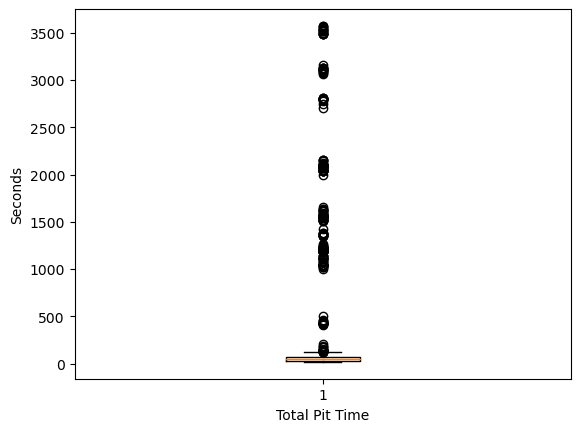

The upper bound for outliers for total pittime is 123.32000000000002


In [9]:
#Rescale pittime and racetime from milliseconds to seconds
agg_table["total_pittime_sec"] = agg_table["total_pittime"]/1000
agg_table["total_racetime_sec"] = agg_table["total_racetime"]/1000

# Dind outliers in total pit time and racetime with boxplots
plt.boxplot(agg_table["total_pittime_sec"])
plt.xlabel("Total Pit Time")
plt.ylabel("Seconds")
plt.show()

#Calculate the 1st and 3rd Quartile of total pittime to find outliers for total pittime
Q1 = np.percentile(agg_table["total_pittime_sec"], 25)
Q3 = np.percentile(agg_table["total_pittime_sec"], 75)
IQR = Q3 - Q1
upperb = Q3 + 1.5 * IQR
print("The upper bound for outliers for total pittime is " + str(upperb))

# We can see the the data is very right skewed and there are a lot of outliers

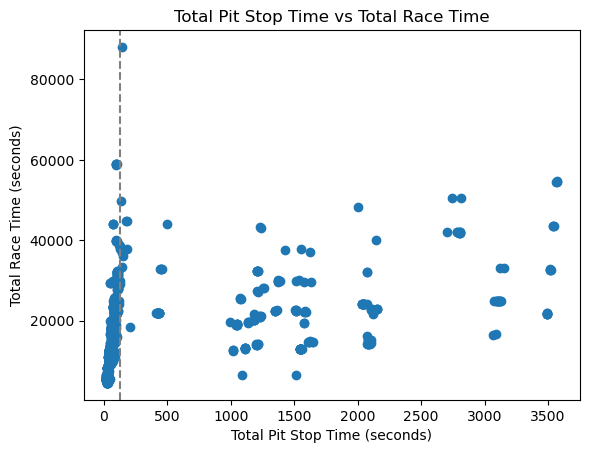

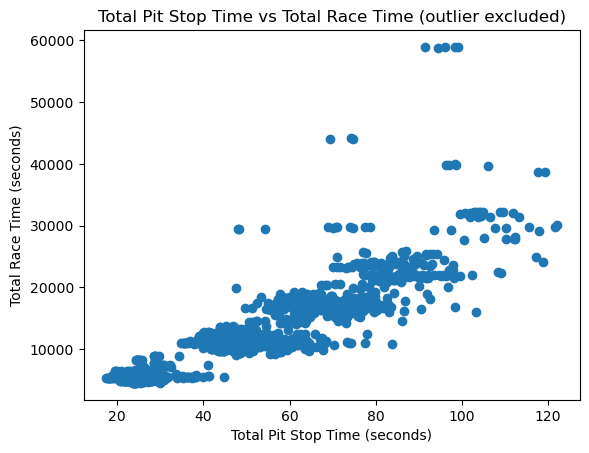

In [10]:
# Scatter graph of Total Race and Pit Stop time and sectioning off outliers
plt.scatter(agg_table["total_pittime_sec"], agg_table["total_racetime_sec"])
plt.xlabel("Total Pit Stop Time (seconds)")
plt.ylabel("Total Race Time (seconds)")
plt.title("Total Pit Stop Time vs Total Race Time")
plt.axvline(x=123, color = "gray", linestyle = "dashed") # section off outliers, there's a white space here
plt.show()


#Exclude outliers by filtering dataframe with boolean expression
merged_agg2 = agg_table[agg_table["total_pittime_sec"] <= 123]

# Replot graph without outliers
plt.scatter(merged_agg2['total_pittime_sec'], merged_agg2['total_racetime_sec'])
plt.xlabel("Total Pit Stop Time (seconds)")
plt.ylabel("Total Race Time (seconds)")
plt.title("Total Pit Stop Time vs Total Race Time (outlier excluded)")
plt.show()

We calculated the line of best fit for our data using the values from our regression. The line of best fit returns a positive correlation between our two variables. That means the longer pit stop duration is positively correlated to a longer finishing time. 

Intercept           -1137.361871
total_pittime_sec     272.026627
dtype: float64
                            OLS Regression Results                            
Dep. Variable:     total_racetime_sec   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     8568.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        17:29:50   Log-Likelihood:                -21223.
No. Observations:                2259   AIC:                         4.245e+04
Df Residuals:                    2257   BIC:                         4.246e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

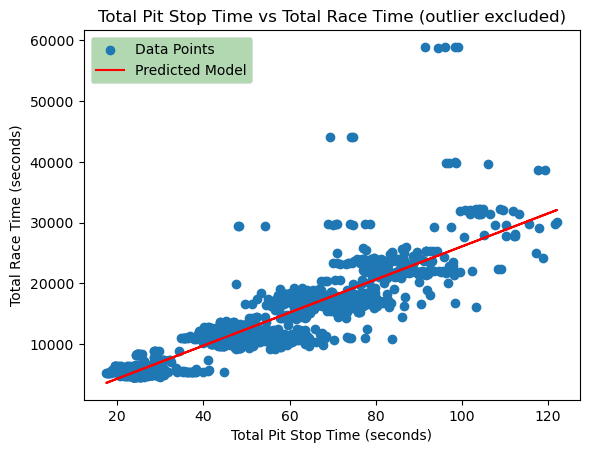

In [11]:
# Linear Regression 1: Total Pit Time and Total Wins with summary
results_pit_time = smf.ols("total_racetime_sec ~ total_pittime_sec", data=merged_agg2).fit()
print(results_pit_time.params)
print(results_pit_time.summary())

# Find line of best fit parameters for Regression 1
m = results_pit_time.params["total_pittime_sec"]
b = results_pit_time.params["Intercept"]

# Visualization of Linear Regression
plt.scatter(merged_agg2['total_pittime_sec'], merged_agg2['total_racetime_sec'])
plt.plot(merged_agg2["total_pittime_sec"], m * merged_agg2["total_pittime_sec"] + b, color="red")
plt.legend(["Data Points", "Predicted Model"], facecolor = "green", framealpha = 0.3, loc = "upper left")
plt.xlabel("Total Pit Stop Time (seconds)")
plt.ylabel("Total Race Time (seconds)")
plt.title("Total Pit Stop Time vs Total Race Time (outlier excluded)")
plt.show()

# The R-Squared and P-value are significant. There is a linear relationship between total pitstop and race time
# With this, we can take the top 5 and bottom 5 in terms of



In [12]:

display(merged_agg2[['total_pittime_sec', 'total_racetime_sec']].describe())
points_asc = merged_agg2[["driverId","avg_position", "total_points", "total_pittime_sec", "total_racetime_sec"]].sort_values('total_points', ascending=False).reset_index()
points_asc

,total_pittime_sec,total_racetime_sec
count,2259.000000,2259.000000
mean,47.529867,11792.027595
std,20.847588,6374.459047
min,17.434000,4526.665000
25%,28.288500,5913.610000
50%,45.762000,11207.042000
75%,60.768000,15029.316000
max,122.126000,58919.964000


,index,driverId,avg_position,total_points,total_pittime_sec,total_racetime_sec
0,1716,830,1.0,130.0,101.859,31356.375
1,2381,830,1.0,104.0,73.012,23211.092
2,964,20,1.0,100.0,77.688,25479.940
3,879,1,1.0,100.0,43.772,11885.238
4,39,20,1.0,100.0,81.609,21670.232
...,...,...,...,...,...,...
2254,1460,828,16.0,0.0,22.785,5798.984
2255,1463,838,13.0,0.0,23.730,5785.753
2256,1464,839,11.0,0.0,45.918,11560.860
2257,1465,840,14.0,0.0,22.661,5791.870


# Data Findings

# RESULTS

# DISCUSSION
Our investigation of F1 racing yielded interesting results. By analyzing two datasets from 1950 to 2023, we found a positive correlation between pit stop duration and the time taken to finish a race. on average, longer pit stop durations are associated with longer finishing times. This ultimately provides valuable insights into how factors like pit stop duration may potentially impact an F1 driver's race outcomes.